# Project Business Statistics: E-news Express


## Define Problem Statement and Objectives
### Business Context
E-news portals let us get quick updates on global events. They use online databases and software to deliver content fast and can include audio, graphics, and video, unlike traditional newspapers.

E-news Express wants to get more subscribers. They plan to look at what visitors do on their site to see what interests them and how to keep them engaged. The company thinks they're losing new subscribers because the current webpage isn't designed well enogh.

### Objective
The design team at E-news Express made a new landing page with better content and layout. To see if it's better, the Data Science team did an A/B test with 100 users, split into two groups: one saw the old page, the other saw the new page. 

1. Do users spend more time on the new page than the old one?
2. Is the conversion rate higher for the new page than the old one?
3. Does the conversion rate depend on the prefered language?
4. Is the time spent on the new page the same for different langauge users?

## Import all the necessary libraries

In [1]:
# Installing the libraries with the specified version.
!pip install matplotlib==3.7.1 numpy==1.25.2 pandas==1.5.3  scipy==1.11.4 seaborn==0.13.1 -q --user

import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns

**Note**: *After running the above cell, kindly restart the notebook kernel and run all cells sequentially from the start again.*

## Reading the Data into a DataFrame

In [2]:
df = pd.read_csv('abtest.csv')

## Explore the dataset and extract insights using Exploratory Data Analysis

- Data Overview
  - Viewing the first and last few rows of the dataset
  - Checking the shape of the dataset
  - Getting the statistical summary for the variables
- Check for missing values
- Check for duplicates

### Dataframe Head and Tail

In [3]:
df.head()

,user_id,group,landing_page,time_spent_on_the_page,converted,language_preferred
0,546592,control,old,3.48,no,Spanish
1,546468,treatment,new,7.13,yes,English
2,546462,treatment,new,4.40,no,Spanish
3,546567,control,old,3.02,no,French
4,546459,treatment,new,4.75,yes,Spanish


In [4]:
df.tail()

,user_id,group,landing_page,time_spent_on_the_page,converted,language_preferred
95,546446,treatment,new,5.15,no,Spanish
96,546544,control,old,6.52,yes,English
97,546472,treatment,new,7.07,yes,Spanish
98,546481,treatment,new,6.20,yes,Spanish
99,546483,treatment,new,5.86,yes,English


### Dataframe Shape

In [5]:
print("There are", df.shape[0], 'rows and', df.shape[1], "columns.")

There are 100 rows and 6 columns.


### Dataframe Stats

In [6]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
user_id,100.0,546517.0000,52.295779,546443.00,546467.75,546492.500,546567.2500,546592.00
time_spent_on_the_page,100.0,5.3778,2.378166,0.19,3.88,5.415,7.0225,10.71


### Dataframe Info

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 6 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   user_id                 100 non-null    int64  
 1   group                   100 non-null    object 
 2   landing_page            100 non-null    object 
 3   time_spent_on_the_page  100 non-null    float64
 4   converted               100 non-null    object 
 5   language_preferred      100 non-null    object 
dtypes: float64(1), int64(1), object(4)
memory usage: 4.8+ KB


### Missing Values

In [8]:
print(df.isnull().sum())
print("There are no missing values in this dataset")

user_id                   0
group                     0
landing_page              0
time_spent_on_the_page    0
converted                 0
language_preferred        0
dtype: int64
There are no missing values in this dataset


### Duplicate Values

In [9]:
print(df.duplicated().sum())
print('\n There are no duplicates in the dataset')

0

 There are no duplicates in the dataset


## Univariate Analysis

### Observations on "Time Spent on The Page"

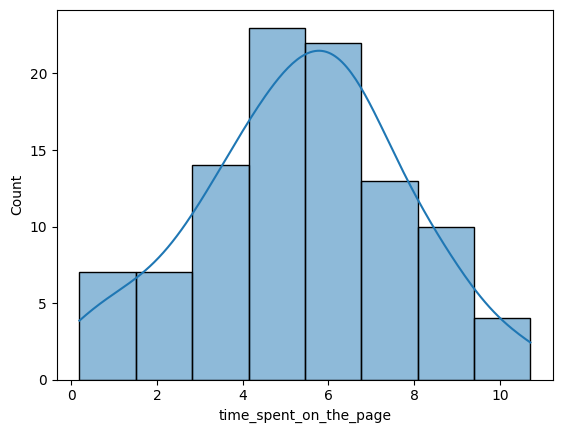

The distribution looks to be normally distributed


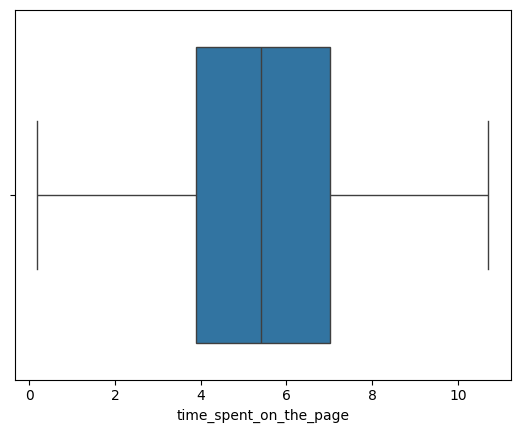

There are no outliers present in this dataset


In [10]:
sns.histplot(data=df, x='time_spent_on_the_page', kde = True)
plt.show();
print('The distribution looks to be normally distributed')
sns.boxplot(data=df, x='time_spent_on_the_page')
plt.show();
print('There are no outliers present in this dataset')

### Landing Page

In [11]:
df['landing_page'].value_counts()

old    50
new    50
Name: landing_page, dtype: int64

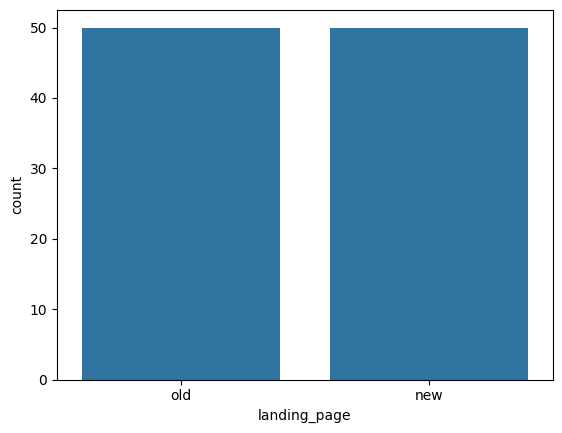

In [12]:
sns.countplot(data=df,x='landing_page');

* landing page is split evenly between new and old

### Group

In [13]:
df['group'].value_counts()

control      50
treatment    50
Name: group, dtype: int64

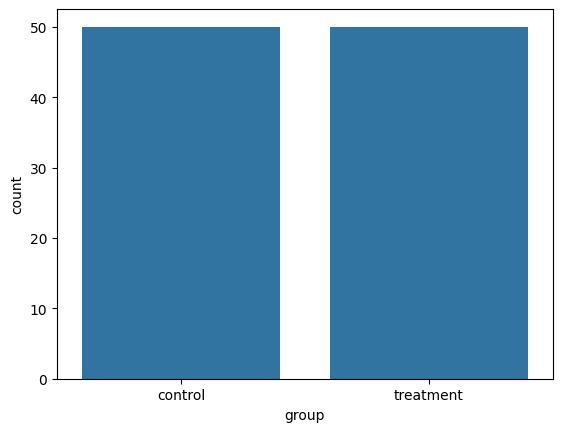

In [14]:
sns.countplot(data = df, x = 'group');

* Group is split evenly between treatment and control

### Language Preferred

In [15]:
df['language_preferred'].value_counts()

Spanish    34
French     34
English    32
Name: language_preferred, dtype: int64

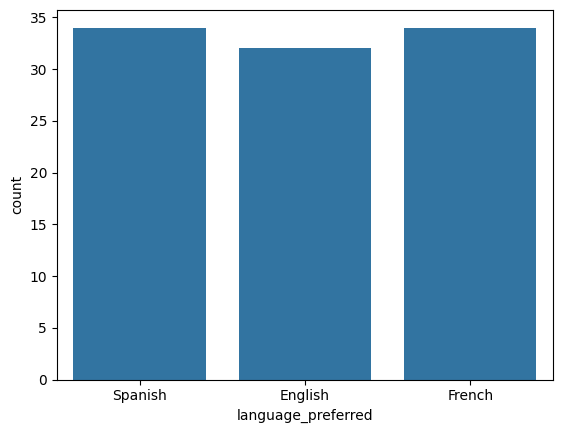

In [16]:
sns.countplot(data=df, x='language_preferred');

* Language Preferred is split relatively evenly between Spanish, French and English with English having slightly less records in the dataset

### Converted

In [17]:
df['converted'].value_counts()

yes    54
no     46
Name: converted, dtype: int64

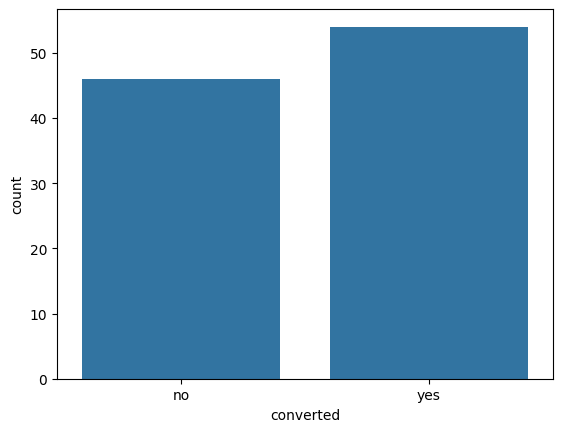

In [18]:
sns.countplot(data = df, x = 'converted');

* 8 more people converted to "Yes" on the landing page than "No"

## Bivariate Analysis

#### "Landing Page" and "Time Spent on the Page"

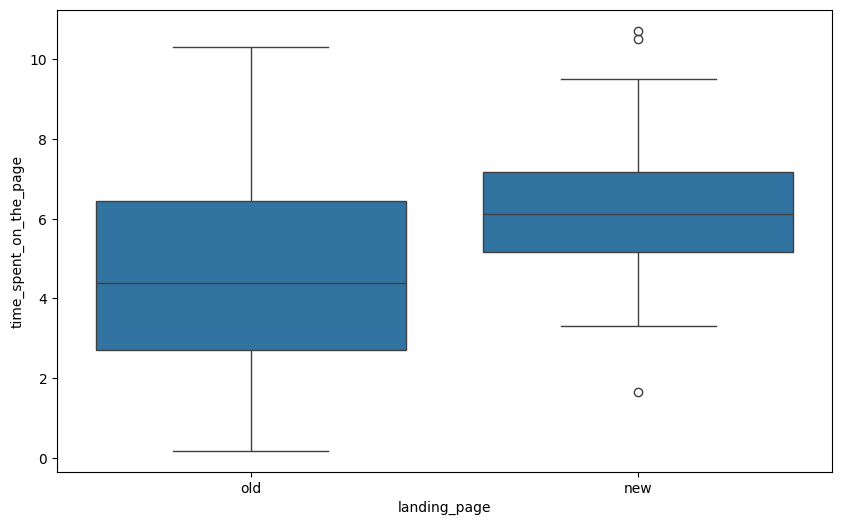

In [19]:
plt.figure(figsize=(10,6))
sns.boxplot(data=df, x='landing_page', y='time_spent_on_the_page')
plt.show();

##### OLD
* 75% of those that visited the "Old" landing page about 6 minutes or less on the site
* There are no outliers present between the relationship of "Old" and "Time Spent on the Page"

##### NEW
* The average visitor spent 2 minutes longer on the "New" landing page
* The variance for the "New" landing page is much lower than the "Old"
* 75% of those that visited the "New" landing page spent 5 minutes or more on the site
* There are 3 outliers present between the relationship of  "New" and "Time Spent on the Page"
* The "New" landing page seemed to have a significant increase in the amount of time users spent on the landing page

#### "Converted" and "Time Spent on the Page"

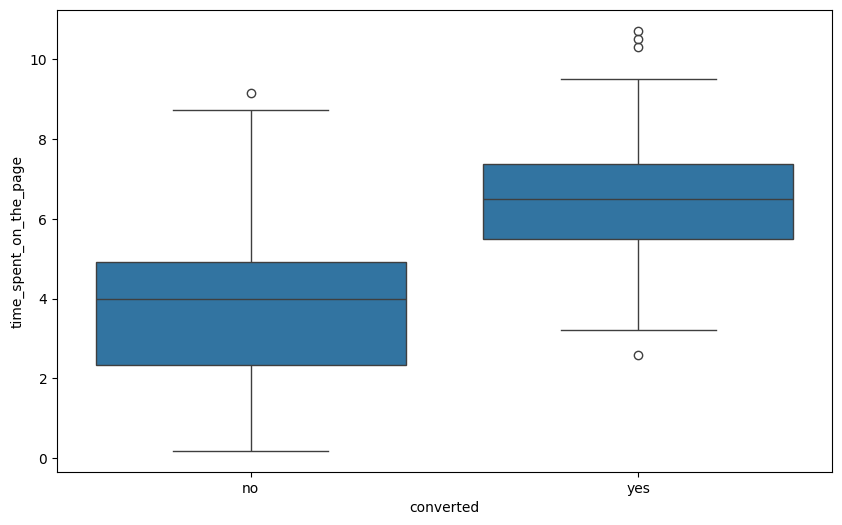

In [20]:
plt.figure(figsize=(10,6))
sns.boxplot(data=df, x='converted', y='time_spent_on_the_page')
plt.show();

#### NO
* There is 1 outlier present between the relationship of "No" and "Time Spent on the Page"
* 75% of those that did not convert spent 5 minutes or less on the landing page

#### YES
* There are 4 outliers present between the relationship of  "Yes" and "Time Spent on the Page"
* Those that converted spent on average two more minutes on on the landing page
* 75% of those converted spent more than 5 minutes on the landing page

### "Group" and "Time Spent on the Page"

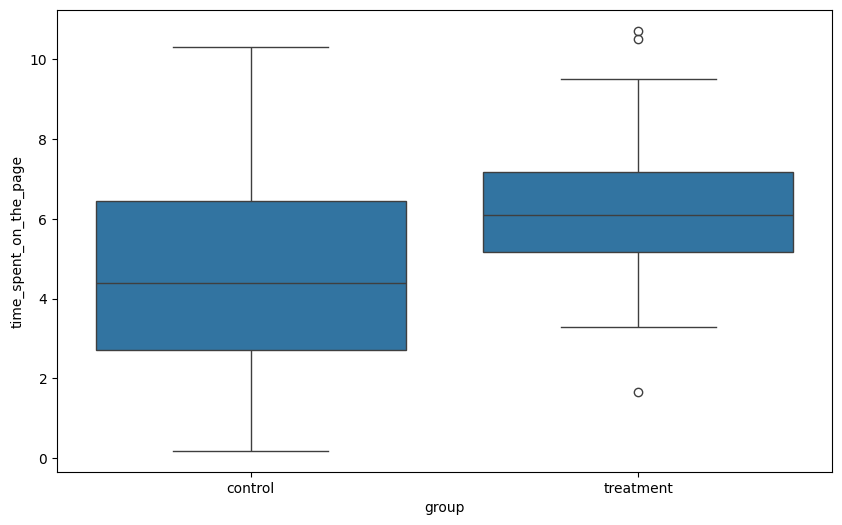

In [21]:
plt.figure(figsize=(10,6))
sns.boxplot(data=df, x='group', y='time_spent_on_the_page')
plt.show();

##### CONTROL
* There are no outliers present between the relationship of "Control" and "Time Spent on the Page"
* The "Control" group had a higher variance in time spent on page
* 75% of the "Control" group spent ~3 minutes or more on the landing page

##### TREATMENT
* There are 3 outliers present between the relationship of "Treatment" and "Time Spent on the Page"
* The average time the "Treatment" group spent on the page is about 2 more minutes than the "Control" group
* 75% of the "Treatment" group spent ~5 minutes or more on the landing page

#### "Language Preferred" and "Time Spent on the Page"

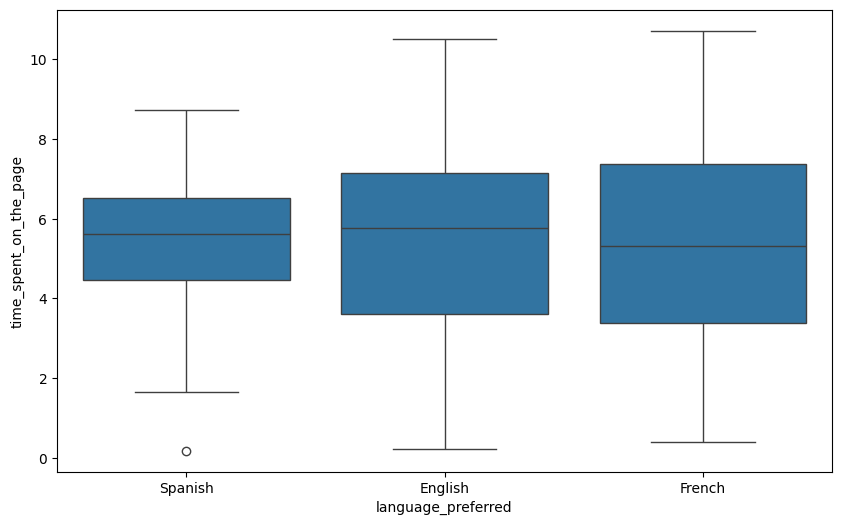

In [22]:
plt.figure(figsize=(10,6))
sns.boxplot(data=df, x='language_preferred', y='time_spent_on_the_page')
plt.show();

##### SPANISH
* Spanish visitors had less variance in the time spent on the page
* There is 1 outliers present between the relationship of "Spanish" and "Time Spent on the Page"

##### ENGLISH & FRENCH
* "English" and "French" visitors are similar in the time they spent on the page but the "French" had a higher variance and the mean "English" spent slightly more time on the page
* There are no outliers present between the relationship of "English" or "French" and "Time Spent on the Page"

## 1. Do the users spend more time on the new landing page than the existing landing page?

### Perform Visual Analysis

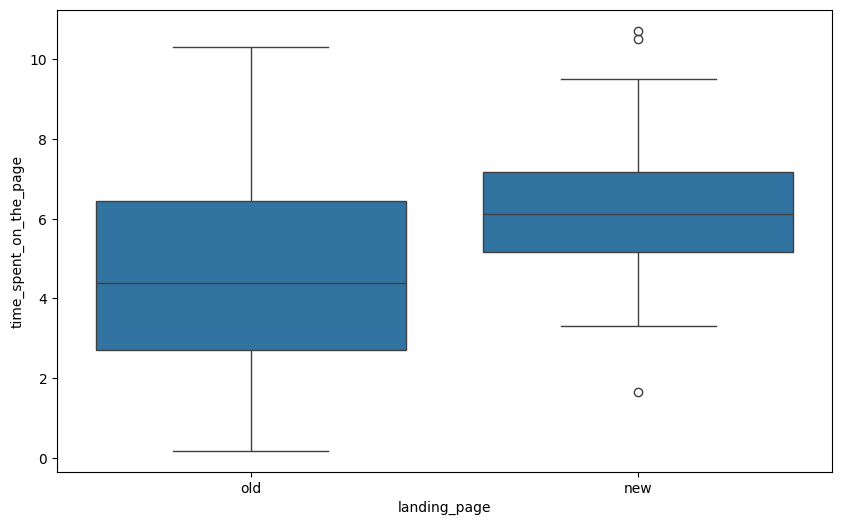

In [23]:
plt.figure(figsize=(10,6))
sns.boxplot(data=df, x='landing_page', y='time_spent_on_the_page')
plt.show();

### Step 1: Define the null and alternate hypotheses

Let $\mu_1, \mu_2$ be the mean time spent on the new and old version of the landing page, respectively.

We want to test whether users spend more time on the new landing page than on the existing landing page

Null Hypothesis
>$H_0:\mu_1=\mu_2$

Alternate Hypothesis
>$H_a:\mu_1>\mu_2$


### Step 2: Select Appropriate test

Independent Samples T-Test (one-tailed)

### Step 3: Decide the significance level

As a data scientist, I need to check the data and do a statistical analysis where $\alpha = 0.05$.

### Step 4: Collect and prepare data

In [24]:
# Create dataframes for new and old visitors
new = df[df['landing_page'] == 'new']['time_spent_on_the_page']
old = df[df['landing_page'] == 'old']['time_spent_on_the_page']

In [25]:
print('NEW standard deviation\n', round(new.std(),2))
print('OLD standard deviation\n', round(old.std(),2))

NEW standard deviation
 1.82
OLD standard deviation
 2.58


* The standard deviations do not look to be very similar

### Step 5: Calculate the p-value

In [26]:
# Import scipy t-test
from scipy.stats import ttest_ind

# Calculate p-value
stat, pval = ttest_ind(new, old, equal_var = False, alternative = 'greater')

# Print p-value
round(pval,5)

0.00014

### Step 6: Compare the p-value with $\alpha$

* The p-value is .00014 which is less than $\alpha$

### Step 7:  Draw inference

* Since the p-value is less than the $\alpha$, we reject the Null Hypothesis meaning that the visitors spend significantly more time on the new page than the old

## 2. Is the conversion rate (the proportion of users who visit the landing page and get converted) for the new page greater than the conversion rate for the old page?

### Perform Visual Analysis

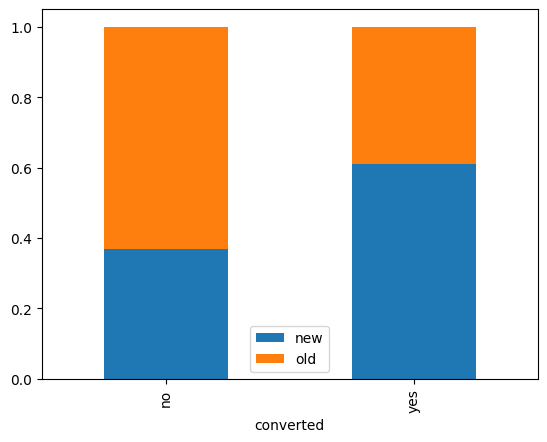

In [27]:
# Compare conversion rate between new and old page
pd.crosstab(df['converted'], df['landing_page'], normalize='index').plot(kind='bar', stacked = True)
plt.legend()
plt.show()

### Step 1: Define the null and alternate hypotheses

Let $\mu_1, \mu_2$ be the conversion rate for site visitors on the new and old version of the landing page, respectively.

We want to test whether the conversion rate (the proportion of users who visit the landing page and get converted) for the new page is greater than the conversion rate for the old page?

Null Hypothesis
>$H_0:\mu_1 \le \mu_2$

Alternate Hypothesis
>$H_a:\mu_1>\mu_2$


### Step 2: Select Appropriate test

* Proportion Z-Test

### Step 3: Decide the significance level

As a data scientist, I need to check the data and do a statistical analysis where $\alpha = 0.05$.

### Step 4: Collect and prepare data

In [28]:
# Calculate the number of visitors in each converted category
new_converts = df[df['group'] == 'treatment']['converted'].value_counts()['yes']
old_converts = df[df['group'] == 'control']['converted'].value_counts()['yes']

print(new_converts, old_converts)

# Number of visitors in each group
treatment_num = df['group'].value_counts()['treatment']
control_num = df['group'].value_counts()['control']

print('Number of Treatment Visitors:\n', treatment_num)
print('Number of Control Visitors:\n', control_num)

33 21
Number of Treatment Visitors:
 50
Number of Control Visitors:
 50


In [29]:
print(f' The proportions of converts in control and treatment groups are {round(33/50,2)}, {round(21/50,2)} respectively')

 The proportions of converts in control and treatment groups are 0.66, 0.42 respectively


### Step 5: Calculate the p-value

In [30]:
# Import function
from statsmodels.stats.proportion import proportions_ztest

# Calculate p-value
stat, pval = proportions_ztest([new_converts, old_converts], [treatment_num, control_num], alternative = 'two-sided')

round(pval,2)

0.02

### Step 6: Compare the p-value with $\alpha$

* The p-value is .02 which is less than $\alpha$

### Step 7:  Draw inference

 * Since the p-value is less than the $\alpha$, we reject the Null Hypothesis meaning that the conversion rate is higher for the new page compared to the old page.

## 3. Is the conversion and preferred language are independent or related?

### Perform Visual Analysis

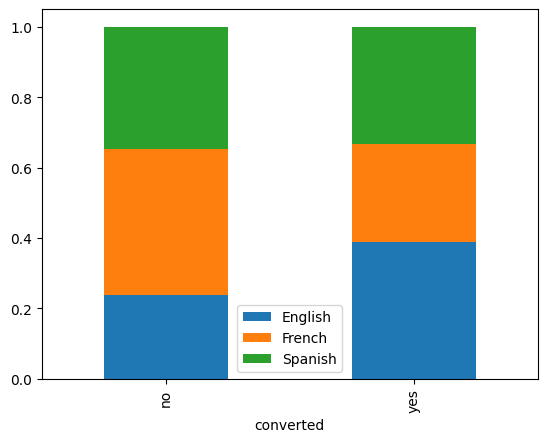

In [31]:
pd.crosstab(df['converted'],df['language_preferred'], normalize='index').plot(kind='bar', stacked= True)
plt.legend()
plt.show;

### Step 1: Define the null and alternate hypotheses

We want to test whether the converted status depend on the preferred language?

Null Hypothesis
>$H_0$: The conversion status is independent of the preferred language

Alternate Hypothesis
>$H_a$: The conversion status depends on the preferred language

### Step 2: Select Appropriate test

* Chi-Square Test

### Step 3: Decide the significance level

As a data scientist, I need to check the data and do a statistical analysis where $\alpha = 0.05$.

### Step 4: Collect and prepare data

In [32]:
# create the contingency table showing the distribution of the two categorical variables
contingency_table = pd.crosstab(df['converted'], df['language_preferred'])
contingency_table

language_preferred,English,French,Spanish
converted,,,
no,11,19,16
yes,21,15,18


### Step 5: Calculate the p-value

In [33]:
# Import library for Chi-Square
from scipy.stats import chi2_contingency

# use chi2_contingency() to find the p-value
chi2, pval, dof, exp_freq = chi2_contingency(contingency_table)

round(pval,2)

0.21

### Step 6: Compare the p-value with $\alpha$

* The p-value is .21 which is more than $\alpha$

### Step 7:  Draw inference

 * Since the p-value is more than the $\alpha$, we accept the Null Hypothesis meaning that the conversion status is not dependent on the language preferred

## 4. Is the time spent on the new page same for the different language users?

### Perform Visual Analysis

In [34]:
# create new dataframe with only visitors of the new landing page
df_new = df[df['landing_page'] == 'new']

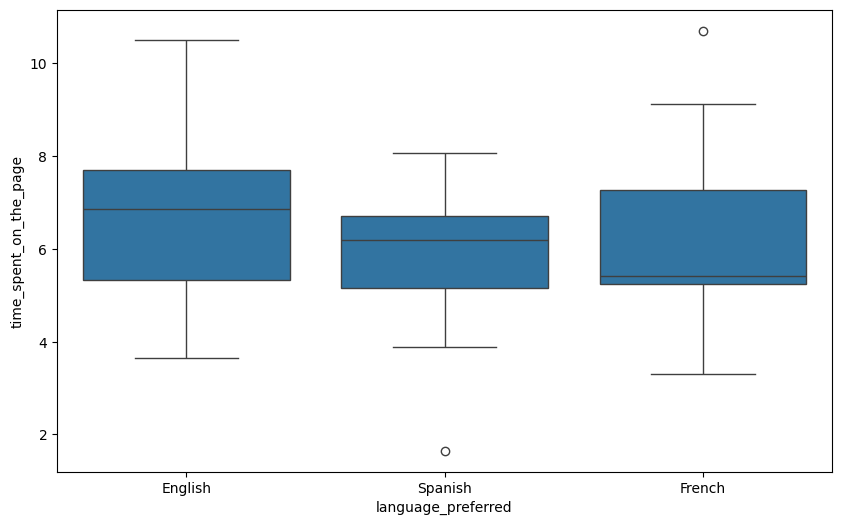

In [35]:
# create boxplot of newly created dataframe
plt.figure(figsize =(10,6))
sns.boxplot(data=df_new, x='language_preferred', y='time_spent_on_the_page')
plt.show()

In [36]:
# calculate the means
df_new.groupby(['language_preferred'])['time_spent_on_the_page'].mean()

language_preferred
English    6.663750
French     6.196471
Spanish    5.835294
Name: time_spent_on_the_page, dtype: float64

### Step 1: Define the null and alternate hypotheses

Let $\mu_S, \mu_E, \mu_F$ be the time spent on the site for users that speak Spanish, English, and French, respectively.

We want to test whether the time spent on the new page is the same for different language users.

Null Hypothesis
>$H_0:\mu_S = \mu_E = \mu_F$

Alternate Hypothesis
>$H_a$: At least one $\mu$ is different 


### Step 2: Select Appropriate test

* ANOVA

### Step 3: Decide the significance level

As a data scientist, I need to check the data and do a statistical analysis where $\alpha = 0.05$.

### Step 4: Collect and prepare data

In [37]:
# Create dataframes for new visitors of the various languages preferred
english_time = df_new[df_new['language_preferred'] == 'English']['time_spent_on_the_page']
french_time = df_new[df_new['language_preferred'] == 'French']['time_spent_on_the_page']
spanish_time = df_new[df_new['language_preferred'] == 'Spanish']['time_spent_on_the_page']

### Step 5: Calculate the p-value

In [38]:
# Import the required function
from scipy.stats import f_oneway

# Calculate p-value
stat, pval = f_oneway(english_time, french_time, spanish_time)

round(pval,2)

0.43

### Step 6: Compare the p-value with $\alpha$

* The p-value is .43 which is more than $\alpha$

### Step 7:  Draw inference

 * Since the p-value is more than the $\alpha$, we accept the Null Hypothesis meaning that the time spent on the new page is not statistically significant for different language users.

## Conclusion and Business Recommendations

### Time Spent on the New Landing Page vs. Old Landing Page

Conclusion: 
* The p-value from the independent samples t-test is 0.00014. 
* We conclude that users spend significantly more time on the new landing page than on the old landing page.

Business Recommendation: 
* Since the new landing page retains users' attention longer, it should be adopted as the default landing page. This increased engagement is likely to result in higher conversion rates and better overall user experience.

### Conversion Rate of New Page vs. Old Page

Conclusion: 
* The p-value from the proportion Z-test is 0.008. 
* We conclude that the conversion rate for the new page is significantly higher than that for the old page.

Business Recommendation: 
* Implement the new landing page as it has demonstrated a higher conversion rate. This change is expected to lead to an increase in new subscribers, directly contributing to the company's growth goals.

### Conversion Status and Preferred Language

Conclusion: 
* The p-value from the chi-square test is 0.213.
* We conclude that there is no significant association between conversion status and preferred language.

Business Recommendation: 
* Since conversion status is independent of the preferred language, the current multilingual support strategy is effective. No changes are needed in this regard, allowing the company to focus resources on other areas for improvement.

### Time Spent on the New Page Across Different Languages

Conclusion: 
* The p-value from the one-way ANOVA test is 0.432.
* We conclude that there is no significant difference in the time spent on the new page among users who prefer different languages.

Business Recommendation: 
* The consistent engagement across different language groups suggests that the new landing page design is universally effective. Continue to monitor user behavior, but no immediate changes are needed to cater to specific language groups.

### Summary of Recommendations
1. Adopt the new landing page: The new design is proven to increase user engagement and conversion rates.
2. Maintain current language support: No significant differences in user behavior across languages were found, indicating the current strategy is effective.
3. Focus on other improvements: With the landing page and language support effectively optimized, resources can be redirected to other areas, such as content quality, user interface enhancements, and marketing strategies.

___